In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Nida Maryam'

In [3]:
os.chdir('C:\\Users\\Nida Maryam\\Documents\\SummerAnalytics')
df=pd.read_csv('indiastates.csv')
df

,States_Union Territories,Income,Literacy Rate,Population,SexRatio,Unemployement,Poverty,GDP per Capita,UrbanPop,Life Expectancy,IMR,Internet,Crime
0,AP,64773,67.02,84581,993,12,9.20,0.765810,33.49,69.0,25,48.8,420.4
1,ArP,71366,65.39,1384,938,17,34.67,51.565029,22.67,NaN,29,71.6,197.7
2,AS,36320,72.19,31206,958,45,31.98,1.163879,14.08,64.7,40,42.3,379.0
3,BH,22582,61.80,104099,918,32,33.74,0.216928,11.30,68.4,29,43.6,228.0
4,CD,136883,86.05,1055,818,24,21.81,129.746919,97.25,NaN,13,91.9,247.1
5,CH,48366,70.28,25545,991,8,39.93,1.893365,23.24,65.2,40,56.3,373.7
6,DL,161446,76.24,16788,868,78,9.91,9.616750,97.50,73.8,11,85.2,1479.9
7,GA,211570,87.10,1459,973,51,5.09,145.010281,62.17,NaN,8,82.9,191.6
8,GJ,85979,86.21,60440,919,3,16.63,1.422551,42.58,69.1,25,58.9,1044.2
9,HY,106320,88.70,25351,879,24,11.16,4.193917,34.79,69.1,27,72.4,697.3


In [4]:
df_states=df['States_Union Territories']
df.set_index('States_Union Territories', inplace=True)
df.rename(columns={'Income':'inc', 'Literacy Rate':'lit', 'Population':'pop','SexRatio':'sex',
                    'Unemployement':'unem','Poverty':'pov', 'GDP per Capita':'gpc','UrbanPop':'urban',
                    'Life Expectancy':'lifeex','Internet':'internet','Crime':'crime',}, inplace=True)
df.columns

Index(['inc', 'lit', 'pop', 'sex', 'unem', 'pov', 'gpc', 'urban', 'lifeex',
       'IMR', 'internet', 'crime'],
      dtype='object')

In [5]:
df.head()

,inc,lit,pop,sex,unem,pov,gpc,urban,lifeex,IMR,internet,crime
States_Union Territories,,,,,,,,,,,,
AP,64773,67.02,84581,993,12,9.20,0.765810,33.49,69.0,25,48.8,420.4
ArP,71366,65.39,1384,938,17,34.67,51.565029,22.67,NaN,29,71.6,197.7
AS,36320,72.19,31206,958,45,31.98,1.163879,14.08,64.7,40,42.3,379.0
BH,22582,61.80,104099,918,32,33.74,0.216928,11.30,68.4,29,43.6,228.0
CD,136883,86.05,1055,818,24,21.81,129.746919,97.25,NaN,13,91.9,247.1


In [6]:
feature_cols = [col for col in df.columns]

from sklearn.impute import KNNImputer
df_knn_imputer = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols] = knn_imputer.fit_transform(df_knn_imputer[feature_cols])


In [7]:
df_scaled = df_knn_imputer.copy()
col_names = ['inc', 'lit', 'pop', 'sex', 'unem', 'pov', 'gpc', 'urban', 'lifeex',
             'IMR', 'internet', 'crime']
features = df_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,inc,lit,pop,sex,unem,pov,gpc,urban,lifeex,IMR,internet,crime
States_Union Territories,,,,,,,,,,,,
AP,-0.233432,-1.273453,1.019789,0.878225,-0.522614,-0.938534,-0.504787,-0.129707,-0.268600,0.246344,-1.198150,0.060613
ArP,-0.072118,-1.463022,-0.842670,-0.188280,-0.365931,1.461746,0.518351,-0.645550,0.403599,0.582021,0.481113,-0.554490
AS,-0.929608,-0.672179,-0.175071,0.199540,0.511494,1.208242,-0.496769,-1.055078,-1.822609,1.505134,-1.676887,-0.053735
BH,-1.265743,-1.880541,1.456721,-0.576100,0.104118,1.374103,-0.515841,-1.187615,-0.485438,0.582021,-1.581140,-0.470801
CD,1.530923,0.939745,-0.850035,-2.515201,-0.146574,0.249826,2.092997,2.910051,0.952923,-0.760688,1.976246,-0.418046
CH,-0.634871,-0.894313,-0.301799,0.839443,-0.647960,1.957446,-0.482077,-0.618375,-1.641910,1.505134,-0.645761,-0.068374
DL,2.131920,-0.201162,-0.497834,-1.545651,1.545602,-0.871624,-0.326521,2.921969,1.466108,-0.928527,1.482779,2.986980
GA,3.358331,1.061861,-0.840991,0.490405,0.699514,-1.325859,2.400414,1.237612,0.952923,-1.180285,1.313379,-0.571338
GJ,0.285427,0.958353,0.479365,-0.556709,-0.804643,-0.238335,-0.491559,0.303659,-0.232460,0.246344,-0.454266,1.783565


In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_scaled)
x_pca=pca.transform(df_scaled)


In [10]:
df_scaled.shape


(31, 12)

In [11]:
x_pca.shape

(31, 2)

Text(0, 0.5, 'Second principle component')

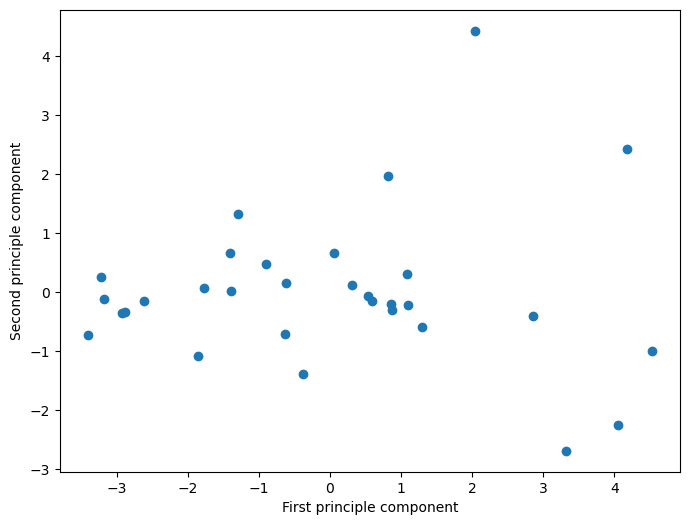

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [13]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans_pca.fit(x_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Nida Maryam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


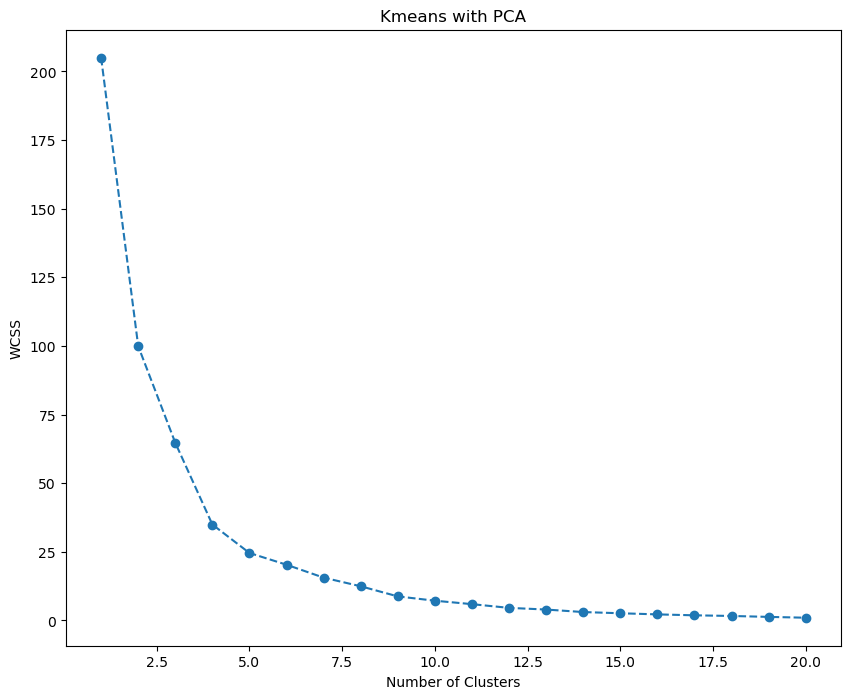

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA')
plt.show()

In [15]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans_pca.fit(x_pca)

KMeans(n_clusters=4, random_state=0)

In [16]:
df_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(x_pca)],axis=1)
df_pca_kmeans.columns.values[-2:]=['Component1','Component2']
df_pca_kmeans['Segment K-Means PCA']=kmeans_pca.labels_
df_pca_kmeans['Segment']=df_pca_kmeans['Segment K-Means PCA'].map({0:'first',
                                                                  1:'second',
                                                                  2:'third',
                                                                  3:'fourth'})

C:\Users\Nida Maryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


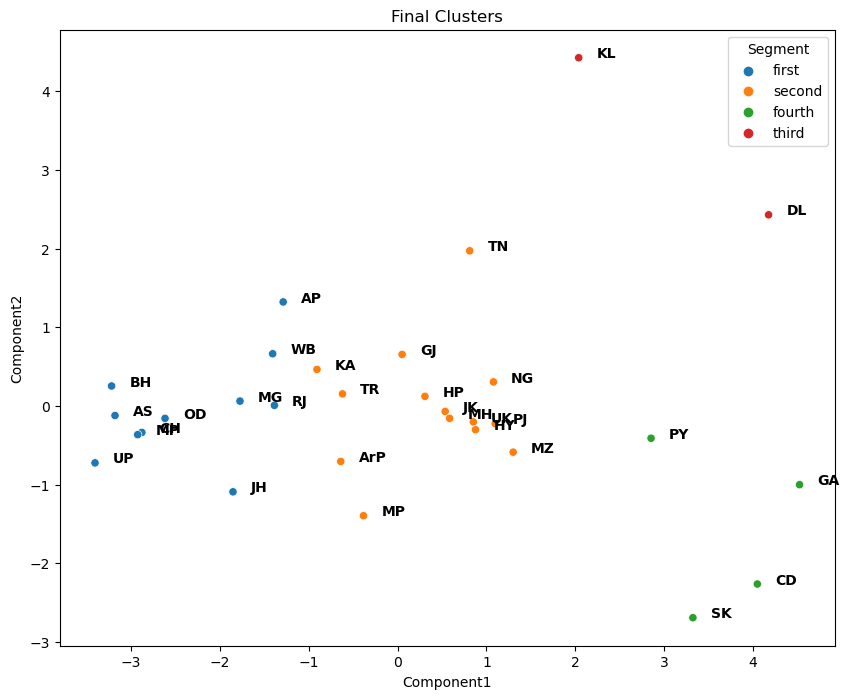

In [17]:
import seaborn as sns

x_axis=df_pca_kmeans['Component1']
y_axis=df_pca_kmeans['Component2']

plt.figure(figsize=(10,8))

sns.scatterplot(x_axis,y_axis,hue=df_pca_kmeans['Segment'],c=['g','r','c','m'])
for line in range(0,df.shape[0]):
     plt.text(df_pca_kmeans.Component1[line]+0.2, df_pca_kmeans.Component2[line], df_states[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Final Clusters')
plt.show()

In [ ]:
#Now that we have an idea of how social and economic welfare varies among provinces, 
#we've been asked to help plan an education program. 
#A pilot phase of the program will be carried out to identify design issues. 
#Our goal is to select the proposal with the most diverse set of provinces.